In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import jieba.analyse
import jieba

import warnings
import time

from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter

warnings.filterwarnings('ignore')

In [25]:
url = 'https://www.cupoy.com/newsfeed/topicgrp/tech_tw'
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get(url)
time.sleep(5)

count = 1
categorylist = []
titlelist = []
contentlist = []
while (count <= 500) :
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        
        # 將文章標題、文章內容、文章來源抓下來
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        title = artical.find('h6').text
        content = artical.find('p').text
        
        # 防止爬到重複的文章
        if title not in titlelist:
            # 將各資料存進list以供後續分析
            categorylist.append(category)
            titlelist.append(title)
            contentlist.append(content)
            # count表文章爬到的數目
            count += 1
        # 停止條件，抓到500篇文章即終止程式
        if count == 501:
            break
    
    # 將網頁繼續向下滑
    time.sleep(0.7)
    browser.execute_script("window.scrollTo(0, 1000000);")
browser.quit()

In [143]:
# 資料排序後顯示
columnName = ['種類','標題','內容']

data = pd.DataFrame([categorylist, titlelist, contentlist])
data = data.T
data.columns = columnName
#data = data.set_index('種類').sort_index()
data

,種類,標題,內容
0,AI與大數據,"Social Science One及臉書終於釋出內含3,800萬個網址的資料集 | iThome",此一資料集將讓社會科學家得以取得過去他們無法存取的資料，藉以研究社交媒體對民主與選舉的影響
1,資訊安全,Google移除逾500個惡意的Chrome擴充程式 | iThome,這些擴充程式多半宣稱自己是廣告程式或優惠程式，除了會將使用者資料上傳到駭客掌控的伺服器，也會...
2,資訊安全,美國五州使用的投票程式Voatz被揪出含有可竄改的漏洞 | iThome,麻省理工學院研究人員指出，在2016年及2018年被應用在美國五州選舉的Voatz投票程式含...
3,Fintech金融科技,疫情帶動宅經濟！電商徵才月薪上看 10 萬元 - INSIDE,"履歷投起來！ 標籤: 徵才, 網路家庭, 富邦媒, 電商"
4,Fintech金融科技,突刪減死亡病例！中國坦言重複統計 數據真實性遭疑 - INSIDE,本週四中國因統計方式改變、新增確診人數較前日暴增近10倍，到了週五，當局又核減了累計死亡病例...
5,Fintech金融科技,川普減稅 2.0 異想天開？鼓勵全民炒股 - INSIDE,目前計劃是收入不超過 20 萬美元 (約 600 萬臺幣) 的家庭，可享有 1 萬美元 (約...
6,物聯網,聯發科搶賺500億臺物聯網裝置財，IC設計流程、產品賣法大不同｜數位時代,物聯網終端裝置在2030年將有上看500億臺的機會，但複雜又零碎的市場，聯發科該如何佈局？而...
7,Fintech金融科技,純網銀大舉徵才！將來銀行改變招募流程、文科生也吃香！人資主管揭選才最看重這兩種能力｜數位時代,多家純網銀業者，紛紛在近期發出人才的招募需求。新世代的金融人才，究竟需要具備那些條件和能力？
8,電子商務,2020年初「破壞式創新大師」克里斯汀生殞落，從《創新的兩難》緬懷巨擘 | SmartM 新...,21世紀最具影響力的「破壞式創新大師」克雷頓‧克里斯汀生，今年年初剛因癌症逝世，他的創新理論...
9,理財,【林富元專欄】疫情再嚴重，投資也不能緩！矽谷投資人分享「三生」心法，教你成為投資贏家-風傳媒,這一陣子，人們的心情受到武漢肺炎擴大蔓延的影響，大多惶恐緊綳。全球的注意力與資源，也迅速地轉...


                1
count   32.000000
mean    15.625000
std     32.424354
min      1.000000
25%      2.000000
50%      5.500000
75%     13.250000
max    173.000000


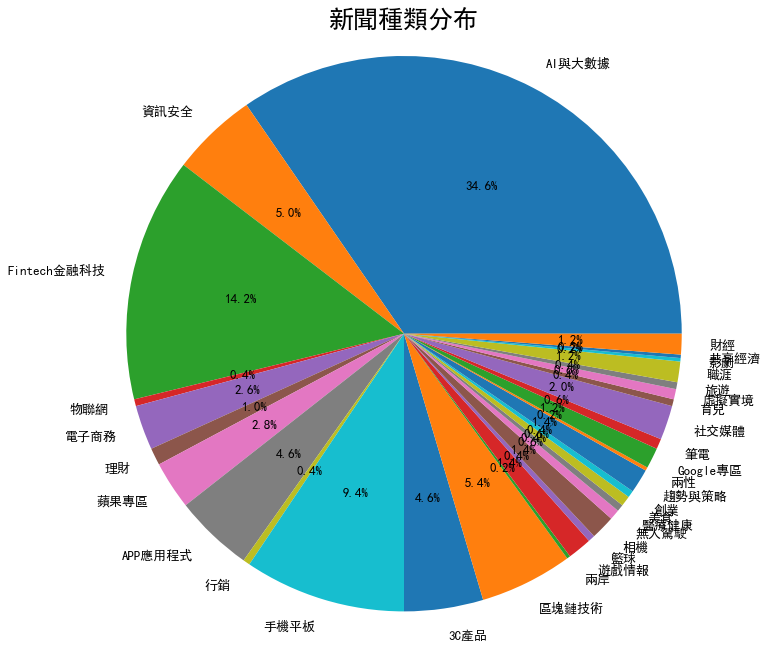

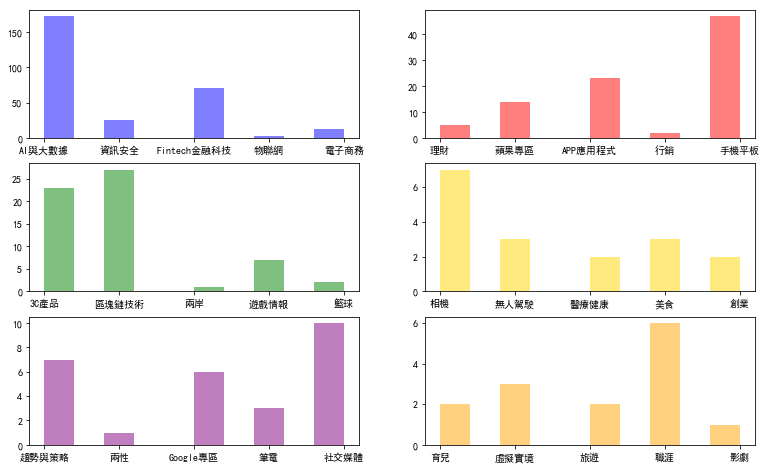

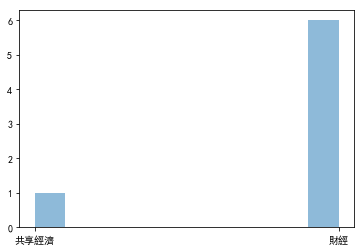

In [162]:
# 用Counter計算種類後排序顯示
sourceDict = dict(Counter(categorylist))
categoryDf = pd.DataFrame(list(sourceDict.items()))
print(categoryDf.describe())

# 解決圖形的中文顯示問題
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 繪出圓餅圖
plt.figure(figsize=(11,11)) # 顯示圖框架大小
plt.title('新聞種類分布', fontsize = '25')
labels = categoryDf[0]          # 製作圓餅圖的類別標籤
size = categoryDf[1]            # 製作圓餅圖的數值來源
patches,l_text,p_text = plt.pie(size, labels=labels, autopct = '%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.show()


# 繪出長條圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple', 'orange']
plotlist = []
plt.figure(figsize = (13,8))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % 5 == 0:
        plt.subplot(3,2,count/5)
        plt.hist(plotlist, alpha=0.5, color=color[int(count/5-1)])
        plotlist = []
    count += 1
plt.show()
plt.hist(plotlist, alpha=0.5)
plt.show()

In [190]:
# 準備標題語料
titleCorpus = ''
for title in titlelist:
    titleCorpus += title 

# 準備內容語料 
contentCorpus = ''
for content in contentlist:
    contentCorpus += content  

#停用詞設定
with open('stopWords.txt', 'r') as f:
    stops = f.read().split('\n')

# 對titleCorpus進行斷詞
term_titleCorpus = []
for word in jieba.cut(titleCorpus):
    if word not in stops:
        term_titleCorpus.append(word)
titleCount = dict(Counter(term_titleCorpus))

# 對contentCorpus進行斷詞
term_contentCorpus = []
for word in jieba.cut(contentCorpus):
    if word not in stops:
        term_contentCorpus.append(word)
contentCount = dict(Counter(term_contentCorpus))

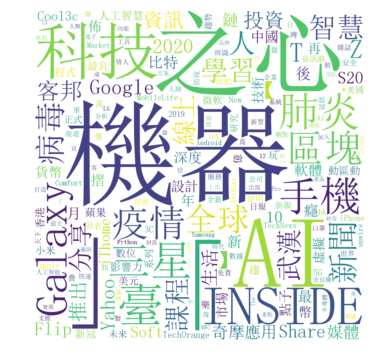

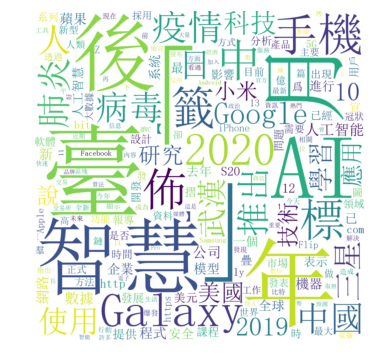

In [192]:
# 字體路徑設定
font = "C:\\Windows\\Fonts\\simsun.ttc"

# 標題文字雲繪圖
title_wordcloud = WordCloud(background_color="white",font_path = font, collocations=False, width=1200, height=1200, margin=2)  
title_wordcloud.generate_from_frequencies(frequencies = titleCount)
plt.figure(figsize=(5,5))
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 內容文字雲繪圖
content_wordcloud = WordCloud(background_color="white",font_path = font, collocations=False, width=1200, height=1200, margin=2)  
content_wordcloud.generate_from_frequencies(frequencies = contentCount)
plt.figure(figsize=(5,5))
plt.imshow(content_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()